In [96]:
import numpy as np
from math import isclose
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [97]:
def plot_fish(fish_state, ax=None, show=True):
    """
    Plot the fish dynamics (states across time)
    """
    T = len(fish_state)

    offset = 3

    if not ax:
        fig, ax = plt.subplots(1, 1, figsize=(12, 3.5))

    x = np.arange(0, T, 1)
    y = offset * (fish_state*2 - 1)

    ax.plot(y, color='cornflowerblue', markersize=10, linewidth=3.0, zorder=0)
    ax.fill_between(x, y, color='cornflowerblue', alpha=.3)

    ax.set_xlabel('time')
    ax.set_ylabel('fish location')

    ax.set_xlim([0, T])
    ax.set_xticks([])
    ax.xaxis.set_label_coords(1.05, .54)

    ax.set_ylim([-(offset+.5), offset+.5])
    ax.set_yticks([-offset, offset])
    ax.set_yticklabels(['left', 'right'])

    ax.spines['bottom'].set_position('center')
    if show:
        plt.show()


def plot_measurement(measurement, ax=None, show=True):
    """
    Plot the measurements
    """
    T = len(measurement)

    rel_pos = 3
    red_y = []
    blue_y = []
    for idx, value in enumerate(measurement):
        if value == 0:
            blue_y.append([idx, -rel_pos])
        else:
            red_y.append([idx, rel_pos])

    red_y = np.asarray(red_y)
    blue_y = np.asarray(blue_y)

    if not ax:
        fig, ax = plt.subplots(1, 1, figsize=(12, 3.5))

    if len(red_y) > 0:
        ax.plot(red_y[:, 0], red_y[:, 1], '*', markersize=8, color='crimson')

    if len(blue_y) > 0:
        ax.plot(blue_y[:, 0], blue_y[:, 1], '*', markersize=8, color='royalblue')

    ax.set_xlabel('time', fontsize=18)
    ax.set_ylabel('Caught fish?')

    ax.set_xlim([0, T])
    ax.set_xticks([])
    ax.xaxis.set_label_coords(1.05, .54)

    ax.set_ylim([-rel_pos - .5, rel_pos + .5])
    ax.set_yticks([-rel_pos, rel_pos])
    ax.set_yticklabels(['no', 'yes!'])

    ax.spines['bottom'].set_position('center')
    if show:
        plt.show()


def plot_act_loc(loc, act, ax_loc=None, show=True):
    """
    Plot the action and location of T time points
    """
    T = len(act)

    if not ax_loc:
        fig, ax_loc = plt.subplots(1, 1, figsize=(12, 2.5))

    loc = loc*2 - 1
    act_down = []
    act_up = []
    for t in range(1, T):
        if loc[t-1] == -1 and loc[t] == 1:
            act_up.append([t - 0.5, 0])
        if loc[t-1] == 1 and loc[t] == -1:
            act_down.append([t - 0.5, 0])

    act_down = np.array(act_down)
    act_up = np.array(act_up)

    ax_loc.plot(loc, 'g.-', markersize=8, linewidth=5)

    if len(act_down) > 0:
        ax_loc.plot(act_down[:, 0], act_down[:, 1], 'rv', markersize=18, zorder=10, label='switch')

    if len(act_up) > 0:
        ax_loc.plot(act_up[:, 0], act_up[:, 1], 'r^', markersize=18, zorder=10)

    ax_loc.set_xlabel('time')
    ax_loc.set_ylabel('Your state')

    ax_loc.set_xlim([0, T])
    ax_loc.set_xticks([])
    ax_loc.xaxis.set_label_coords(1.05, .54)

    if len(act_down) > 0:
        ax_loc.legend(loc="upper right")
    elif len(act_down) == 0 and len(act_up) > 0:
        ax_loc.plot(act_up[:, 0], act_up[:, 1], 'r^', markersize=18, zorder=10, label='switch')
        ax_loc.legend(loc="upper right")

    ax_loc.set_ylim([-1.1, 1.1])
    ax_loc.set_yticks([-1, 1])

    ax_loc.tick_params(axis='both', which='major')
    ax_loc.set_yticklabels(['left', 'right'])

    ax_loc.spines['bottom'].set_position('center')

    if show:
        plt.show()


def plot_belief(belief, ax1=None, choose_policy=None, show=True):
    """
    Plot the belief dynamics of T time points
    """

    T = belief.shape[1]

    if not ax1:
        fig, ax1 = plt.subplots(1, 1, figsize=(12, 2.5))

    ax1.plot(belief[1, :], color='midnightblue', markersize=10, linewidth=3.0)

    ax1.set_xlabel('time')
    ax1.set_ylabel('Belief (right)')

    ax1.set_xlim([0, T])
    ax1.set_xticks([])
    ax1.xaxis.set_label_coords(1.05, 0.05)

    ax1.set_yticks([0, 1])
    ax1.set_ylim([0, 1.1])

    labels = [item.get_text() for item in ax1.get_yticklabels()]
    ax1.set_yticklabels(['    0', '    1'])

    """
    if choose_policy == "threshold":
      ax2 = ax1.twinx()
      ax2.plot(time_range, threshold * np.ones(time_range.shape), 'r--')
      ax2.plot(time_range, (1 - threshold) * np.ones(time_range.shape), 'c--')
      ax2.set_yticks([threshold, 1 - threshold])
      ax2.set_ylim([0, 1.1])
      ax2.tick_params(axis='both', which='major', labelsize=18)
      labels = [item.get_text() for item in ax2.get_yticklabels()]
      labels[0] = 'threshold to switch \n from left to right'
      labels[-1] = 'threshold to switch \n from right to left'
      ax2.set_yticklabels(labels)
    """
    if show:
        plt.show()


def plot_dynamics(belief, loc, act, meas, fish_state, choose_policy):
    """
    Plot the dynamics of T time points
    """
    if choose_policy == 'threshold':
        fig, [ax0, ax_bel, ax_loc, ax1] = plt.subplots(4, 1, figsize=(12, 9))
        plot_fish(fish_state, ax=ax0, show=False)
        plot_belief(belief, ax1=ax_bel, show=False)
        plot_measurement(meas, ax=ax1, show=False)
        plot_act_loc(loc, act, ax_loc=ax_loc)
    else:
        fig, [ax0, ax_bel, ax1] = plt.subplots(3, 1, figsize=(12, 7))
        plot_fish(fish_state, ax=ax0, show=False)
        plot_belief(belief, ax1=ax_bel, show=False)
        plot_measurement(meas, ax=ax1, show=False)

    plt.tight_layout()
    plt.show()


def belief_histogram(belief, bins=100):
    """
    Plot the histogram of belief states
    """
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.hist(belief, bins)
    ax.set_xlabel('belief', fontsize=18)
    ax.set_ylabel('count', fontsize=18)
    plt.show()


def plot_value_threshold(threshold_array, value_array):
    """
    Helper function to plot the value function and threshold
    """
    yrange = np.max(value_array) - np.min(value_array)
    star_loc = np.argmax(value_array)

    fig_, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(threshold_array, value_array, 'b')
    ax.vlines(threshold_array[star_loc],
              min(value_array) - yrange * .1, max(value_array),
              colors='red', ls='--')
    ax.plot(threshold_array[star_loc],
            value_array[star_loc],
            '*', color='crimson',
            markersize=20)

    ax.set_ylim([np.min(value_array) - yrange * .1,
                 np.max(value_array) + yrange * .1])
    ax.set_title(f'threshold vs value with switching cost c = {cost_sw:.2f}',
                 fontsize=20)
    ax.set_xlabel('threshold', fontsize=16)
    ax.set_ylabel('value', fontsize=16)
    plt.show()

In [98]:
# @title Helper Functions

# To generate a binomial with fixed "noise",
# we generate a fist sequence of T numbers uniformly at random
# this sequence can be changed later with different size T
np.random.seed(42)
init_T = 100
rnd_tele = np.random.uniform(0, 1, init_T)
rnd_high_rwd = np.random.uniform(0, 1, init_T)
rnd_low_rwd = np.random.uniform(0, 1, init_T)


def get_randomness(T):

    global rnd_tele
    global rnd_high_rwd
    global rnd_low_rwd

    rnd_tele = np.random.uniform(0, 1, T)
    rnd_high_rwd = np.random.uniform(0, 1, T)
    rnd_low_rwd = np.random.uniform(0, 1, T)


def binomial_tele(p, T):
    if len(rnd_tele) < T:
        get_randomness(T)

    return np.array([1 if p > rnd_tele[i] else 0 for i in range(T)])


# Need a better name
def getRandomness(p, T):

    global rnd_tele
    global rnd_high_rwd
    global rnd_low_rwd

    rnd_tele = np.random.uniform(0, 1, T)
    rnd_high_rwd = np.random.uniform(0, 1, T)
    rnd_low_rwd = np.random.uniform(0, 1, T)

    return [binomial_tele(p, T), rnd_high_rwd, rnd_low_rwd]


class ExcerciseError(AssertionError):
    pass


class binaryHMM():

    def __init__(self, params, T, fish_initial=0, loc_initial=0):
        self.params = params
        self.fish_initial = fish_initial
        self.loc_initial = loc_initial
        self.T = T

    def fish_dynamics(self):
        """
        fish state dynamics according to telegraph process
    
        Returns:
          fish_state (numpy array of int)
        """

        p_stay, _, _, _ = self.params
        fish_state = np.zeros(self.T, int)  # 0: left side and 1: right side

        # initialization
        fish_state[0] = self.fish_initial
        tele_operations = binomial_tele(p_stay, self.T) # 0: switch and 1: stay

        for t in range(1, self.T):
            # we use logical operation NOT XOR to determine the next state
            fish_state[t] = int(not(fish_state[t-1] ^ tele_operations[t]))

        return fish_state

    def generate_process_lazy(self):
        """
        fish dynamics and rewards if you always stay in the initial location
        without changing sides
    
        Returns:
          fish_state (numpy array of int): locations of the fish
          loc (numpy array of int): left or right site, 0 for left, and 1 for right
          rwd (numpy array of binary): whether a fish was catched or not
        """

        _, p_low_rwd, p_high_rwd, _ = self.params

        fish_state = self.fish_dynamics()
        rwd = np.zeros(self.T, int)  # 0: no food, 1: get food

        for t in range(0, self.T):
            # new measurement
            if fish_state[t] != self.loc_initial:
                rwd[t] = 1 if p_low_rwd > rnd_low_rwd[t] else 0
            else:
                rwd[t] = 1 if p_high_rwd > rnd_high_rwd[t] else 0

            # rwd[t] = binomial(1, p_rwd_vector[(fish_state[t] == loc[t]) * 1])
        return fish_state, self.loc_initial*np.ones(self.T), rwd


class binaryHMM_belief(binaryHMM):

    def __init__(self, params, T,
                 fish_initial=0, loc_initial=1,
                 choose_policy='threshold'):

        binaryHMM.__init__(self, params, T, fish_initial, loc_initial)
        self.choose_policy = choose_policy

    def generate_process(self):
        """
        fish dynamics and measurements based on the chosen policy
    
        Returns:
          belief (numpy array of float): belief on the states of the two sites
          act (numpy array of string): actions over time
          loc (numpy array of int): left or right site
          measurement (numpy array of binary): whether a reward is obtained
          fish_state (numpy array of int): fish locations
        """

        p_stay, low_rew_p, high_rew_p, threshold = self.params
        fish_state = self.fish_dynamics()     # 0: left side; 1: right side
        loc = np.zeros(self.T, int)                # 0: left side, 1: right side
        measurement = np.zeros(self.T, int)        # 0: no food, 1: get food
        act = np.empty(self.T, dtype='object')     # "stay", or "switch"
        belief = np.zeros((2, self.T), float)      # the probability that the fish is on the left (1st element)
        # or on the right (2nd element),
        # the beliefs on the two boxes sum up to be 1

        rew_prob = np.array([low_rew_p, high_rew_p])

        # initialization
        loc[0] = self.loc_initial
        measurement[0] = 0
        belief_0 = np.random.random(1)[0]
        belief[:, 0] = np.array([belief_0, 1 - belief_0])
        act[0] = self.policy(threshold, belief[:, 0], loc[0])

        for t in range(1, self.T):
            if act[t - 1] == "stay":
                loc[t] = loc[t - 1]
            else:
                loc[t] = int(not(loc[t - 1] ^ 0))

            # new measurement
            # measurement[t] = binomial(1, rew_prob[(fish_state[t] == loc[t]) * 1])
            if fish_state[t] != loc[t]:
                measurement[t] = 1 if low_rew_p > rnd_low_rwd[t] else 0
            else:
                measurement[t] = 1 if high_rew_p > rnd_high_rwd[t] else 0

            belief[0, t] = self.belief_update(belief[0, t - 1] , loc[t],
                                              measurement[t], p_stay,
                                              high_rew_p, low_rew_p)
            belief[1, t] = 1 - belief[0, t]

            act[t] = self.policy(threshold, belief[:, t], loc[t])

        return belief, loc, act, measurement, fish_state

    def policy(self, threshold, belief, loc):
        """
        chooses policy based on whether it is lazy policy
            or a threshold-based policy
    
        Args:
          threshold (float): the threshold of belief on the current site,
              when the belief is lower than the threshold, switch side
          belief (numpy array of float): the belief on the two sites
          loc (int) : the location of the agent
    
        Returns:
          act (string): "stay" or "switch"
        """
        if self.choose_policy == "threshold":
            act = policy_threshold(threshold, belief, loc)
        if self.choose_policy == "lazy":
            act = policy_lazy(belief, loc)

        return act

    def belief_update(self, belief_past, loc, measurement, p_stay,
                      high_rew_p, low_rew_p):
        """
        using PAST belief on the LEFT box, CURRENT location and
            and measurement to update belief
        """
        rew_prob_matrix = np.array([[1 - high_rew_p, high_rew_p],
                                    [1 - low_rew_p, low_rew_p]])

        # update belief posterior, p(s[t] | measurement(0-t), act(0-t-1))
        belief_0 = (belief_past * p_stay  + (1 - belief_past) * (1 - p_stay)) * \
                   rew_prob_matrix[(loc + 1) // 2, measurement]
        belief_1 = ((1 - belief_past) * p_stay + belief_past * (1 - p_stay)) * \
                   rew_prob_matrix[1-(loc + 1) // 2, measurement]

        belief_0 = belief_0 / (belief_0 + belief_1)

        return belief_0


def policy_lazy(belief, loc):
    """
    This function is a lazy policy where stay is also taken
    """
    act = "stay"

    return act


def test_policy_threshold():
    well_done = True
    for loc in [-1, 1]:
        threshold = 0.4
        belief = np.array([.2, .3])
        if policy_threshold(threshold, belief, loc) != "switch":
            raise ExcerciseError("'policy_threshold' function is not correctly implemented!")
    for loc in [1, -1]:
        threshold = 0.6
        belief = np.array([.7, .8])
        if policy_threshold(threshold, belief, loc) != "stay":
            raise ExcerciseError("'policy_threshold' function is not correctly implemented!")
    print("Well Done!")


def test_policy_threshold():
    for loc in [-1, 1]:
        threshold = 0.4
        belief = np.ones(2) * (threshold + 0.1)
        belief[(loc + 1) // 2] = threshold - 0.1

        if policy_threshold(threshold, belief, loc) != "switch":
            raise ExcerciseError("'policy_threshold' function is not correctly implemented!")
        if policy_threshold(threshold, belief, -1 * loc) != "stay":
            raise ExcerciseError("'policy_threshold' function is not correctly implemented!")

    print("Well Done!")


def test_value_function():
    measurement = np.array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1])
    act = np.array(["switch", "stay", "switch", "stay", "stay",
                    "stay", "switch", "switch", "stay", "stay"])
    cost_sw = .5
    if not isclose(get_value(measurement, act, cost_sw), .1):
        raise ExcerciseError("'value_function' function is not correctly implemented!")
    print("Well Done!")

In [99]:
@widgets.interact(p_stay=widgets.FloatSlider(.9, description="stay_prob", min=0., max=1., step=0.01))

def update_ex_1(p_stay):
    """
      T: Length of timeline
      p_stay: probability that the fish do not swim to the other side at time t
    """
    params = [p_stay, _, _, _]

    # initial condition: fish [fish_initial] start at the left location (-1)
    binaryHMM_test = binaryHMM(params=params, fish_initial=1, T=100)

    fish_state = binaryHMM_test.fish_dynamics()
    plot_fish(fish_state)

plt.show()

interactive(children=(FloatSlider(value=0.9, description='stay_prob', max=1.0, step=0.01), Output()), _dom_cla…

In [100]:

@widgets.interact(locs=widgets.RadioButtons(options=['same location', 'different locations'],
                                            description='Fish and agent:',
                                            disabled=False,
                                            layout={'width': 'max-content'}),
                  p_low_rwd=widgets.FloatSlider(.1, description="low_rew_prob:",
                                                min=0., max=1.),
                  p_high_rwd=widgets.FloatSlider(.9, description="high_rew_prob:",
                                                 min=0., max=1.))

def update_ex_2(locs, p_low_rwd, p_high_rwd):
    """
      p_stay: probability of fish staying at current side at time t
      p_low_rwd: probability of catching fish when you're NOT on the side where the fish are swimming
      p_high_rwd: probability of catching fish when you're on the side where the fish are swimming
      fish_initial: initial side of fish (-1 left, 1 right)
      agent_initial: initial side of the agent (YOU!) (-1 left, 1 right)
    """
    p_stay = 1
    params = [p_stay, p_low_rwd, p_high_rwd, _]

    # initial condition for fish [fish_initial] and you [loc_initial]
    if locs == 'same location':
        binaryHMM_test = binaryHMM(params, fish_initial=0, loc_initial=0, T=100)
    else:
        binaryHMM_test = binaryHMM(params, fish_initial=1, loc_initial=0, T=100)

    fish_state, loc, measurement = binaryHMM_test.generate_process_lazy()
    plot_measurement(measurement)

interactive(children=(RadioButtons(description='Fish and agent:', layout=Layout(width='max-content'), options=…

In [101]:
@widgets.interact(p_stay=widgets.FloatSlider(.96, description="stay_prob",
                                             min=.8, max=1., step=.01),
                  p_low_rwd=widgets.FloatSlider(.1, description="low_rew_prob",
                                                min=0., max=1., step=.01),
                  p_high_rwd=widgets.FloatSlider(.3, description="high_rew_prob",
                                                 min=0., max=1., step=.01))

def update_ex_2(p_stay, p_low_rwd, p_high_rwd):
    """
      T: Length of timeline
      p_stay: probability of fish staying at current side at time t
      p_high_rwd: probability of catching fish when you're on the side where the fish are swimming
      p_low_rwd: probability of catching fish when you're NOT on the side where the fish are swimming
      fish_initial: initial side of fish (0 left, 1 right)
      agent_initial: initial side of the agent (YOU!) (0 left, 1 right)
      threshold: threshold of belief below which the action is switching
    """
    threshold = 0.2
    params = [p_stay, p_low_rwd, p_high_rwd, threshold]

    binaryHMM_test = binaryHMM_belief(params, choose_policy="lazy",
                                      fish_initial=0, loc_initial=0, T=100)

    belief, loc, act, measurement, fish_state = binaryHMM_test.generate_process()
    plot_dynamics(belief, loc, act, measurement, fish_state,
                  binaryHMM_test.choose_policy)

interactive(children=(FloatSlider(value=0.96, description='stay_prob', max=1.0, min=0.8, step=0.01), FloatSlid…

In [102]:
def policy_threshold(threshold, belief, loc):
    """
    chooses whether to switch side based on whether the belief
        on the current site drops below the threshold
  
    Args:
      threshold (float): the threshold of belief on the current site,
                          when the belief is lower than the threshold, switch side
      belief (numpy array of float, 2-dimensional): the belief on the
                                                    two sites at a certain time
      loc (int) : the location of the agent at a certain time
                  -1 for left side, 1 for right side
  
    Returns:
      act (string): "stay" or "switch"
    """

    ############################################################################
    ## 1. Modify the code below to generate actions (stay or switch)
    ##    for current belief and location
    ##
    ## Belief is a 2d vector: first element = Prob(fish on Left | measurements)
    ##                       second element = Prob(fish on Right  | measurements)
    ## Returns "switch" if Belief that fish are in your current location < threshold
    ##         "stay" otherwise
    ##
    ## Hint: use loc value to determine which row of belief you need to use
    ##       see the docstring for more information about loc
    ##
    ## 2. After completing the function, comment this line:
    current_loc_index = 0 if loc == -1 else 1 
    if belief[current_loc_index] < threshold:
        # action below threshold
        act = 'switch'
    else:
        # action above threshold
        act = 'stay'

    return act


# Next line tests your function
test_policy_threshold()

Well Done!


In [103]:
@widgets.interact(threshold=widgets.FloatSlider(.2, description="threshold", min=0., max=1., step=.01),
                  new_seed=widgets.ToggleButtons(options=['Reusing', 'Refreshing'],
                                                 description='Random seed:',
                                                 disabled=False,
                                                 button_style='', # 'success', 'info', 'warning', 'danger' or '',
                                                 icons=['check'] * 2
                                                 ))
def update_ex_4(threshold, new_seed):
    """
      p_stay: probability fish stay
      high_rew_p: p(catch fish) when you're on their side
      low_rew_p : p(catch fish) when you're on other side
      threshold: threshold of belief below which switching is taken
  
    """
    if new_seed == "Refreshing":
        get_randomness(T=100)

    stay_prob=.95
    high_rew_p=.3
    low_rew_p=.1

    params = [stay_prob, high_rew_p, low_rew_p, threshold]

    # initial condition for fish [fish_initial] and you [loc_initial]
    binaryHMM_test = binaryHMM_belief(params, fish_initial=0, loc_initial=0, choose_policy="threshold", T=100)

    belief, loc, act, measurement, fish_state = binaryHMM_test.generate_process()
    plot_dynamics(belief, loc, act, measurement,
                  fish_state, binaryHMM_test.choose_policy)
    plt.show()

interactive(children=(FloatSlider(value=0.2, description='threshold', max=1.0, step=0.01), ToggleButtons(descr…

In [104]:
def get_value(rewards, actions, cost_sw):
    """
    value function
  
    Args:
      rewards (numpy array of length T): whether a reward is obtained (1) or not (0) at each time step
      actions (numpy array of length T): action, "stay" or "switch", taken at each time step.
      cost_sw (float): the cost of switching to the other location
  
    Returns:
      value (float): expected utility per unit time
    """
    actions_int = (actions == "switch").astype(int)

    # Calculate the value function
    value = np.sum(rewards - actions_int * cost_sw) / rewards.shape[0]

    return value


# Test your function
test_value_function()

Well Done!


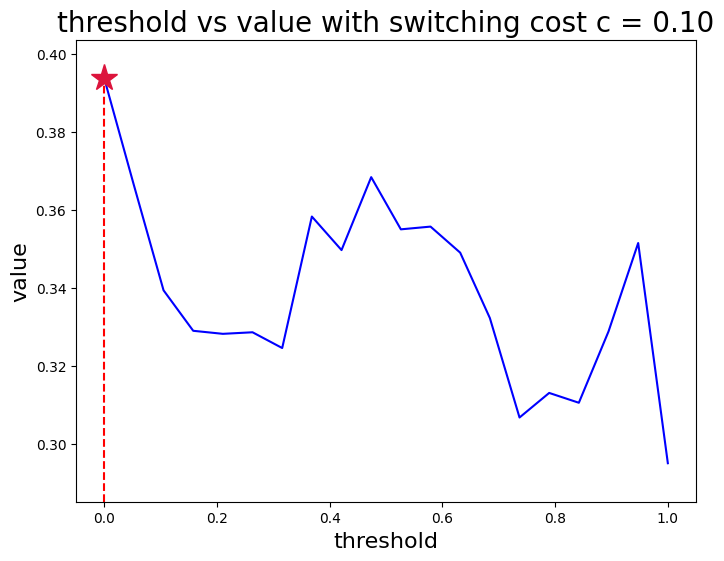

In [105]:
large_time_horizon = 10000
get_randomness(large_time_horizon)

def run_policy(threshold, p_stay, low_rew_p, high_rew_p):
    """
    This function executes the policy (fully parameterized by the threshold) and
    returns two arrays:
      The sequence of actions taken from time 0 to T
      The sequence of rewards obtained from time 0 to T
    """

    params = [p_stay, low_rew_p, high_rew_p, threshold]
    binaryHMM_test = binaryHMM_belief(params, choose_policy="threshold", T=large_time_horizon)
    _, _, actions, rewards, _ = binaryHMM_test.generate_process()
    return actions, rewards


def get_optimal_threshold(p_stay, low_rew_p, high_rew_p, cost_sw):
    """
    Args:
      p_stay (float): probability of fish staying in their current location
      low_rew_p (float): probability of catching fish when you and the fist are in different locations.
      high_rew_p (float): probability of catching fish when you and the fist are in the same location.
      cost_sw (float): the cost of switching to the other location
  
    Returns:
      value (float): expected utility per unit time
    """
    
    # Create an array of 20 equally distanced candidate thresholds (min = 0., max=1.):
    threshold_array = np.linspace(0.0, 1.0, 20) 

    # Using the function get_value() that you coded before and
    # the function run_policy() that we provide, compute the value of your
    # candidate thresholds:

    # Create an array to store the value of each of your candidates:
    value_array = np.zeros_like(threshold_array)

    for i in range(len(threshold_array)):
        actions, rewards = run_policy(threshold_array[i], p_stay, low_rew_p, high_rew_p)
        value_array[i] = get_value(rewards, actions, cost_sw)

    # Return the array of candidate thresholds and their respective values

    return threshold_array, value_array


# Feel free to change these parameters
stay_prob = .9         # Fish stay at current location with probability stay_prob
low_rew_prob = 0.1     # Even if fish are somewhere else, you can catch some fish with probability low_rew_prob
high_rew_prob = 0.7    # When you and the fish are in the same place, you can catch fish with probability high_rew_prob
cost_sw = .1           # When you switch locations, you pay this cost: cost_sw


# Visually determine the threshold that obtains the maximum utility.
# Remember, policies are parameterized by a threshold on beliefs:
# when your belief that the fish are on your current side falls below a threshold 𝜃, you switch to the other side.
threshold_array, value_array = get_optimal_threshold(stay_prob, low_rew_prob, high_rew_prob, cost_sw)
plot_value_threshold(threshold_array, value_array)

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from collections import namedtuple
import ipywidgets as widgets


In [107]:
def plot_vs_time(s, slabel, color, goal=None, ylabel=None, show=True):
    plt.plot(s, color, label=slabel)
    if goal is not None:
        plt.plot(goal, 'm--', label='goal $g$')
    plt.xlabel("Time", fontsize=14)
    plt.legend(loc="upper right")

    if ylabel:
        plt.ylabel(ylabel, fontsize=14)
    if show:
        plt.show()


def plot_kf_state_vs_time(latent_states, estimates, title, goal=None):

    fig = plt.figure(figsize=(12, 4))
    plt.suptitle(title, y=1.05)
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])

    ax0 = plt.subplot(gs[0])
    ax0.plot(latent_states, estimates, 'r.')
    ax0.plot(latent_states, latent_states, 'b')
    ax0.set_xlabel('Latent State')
    ax0.set_ylabel('Estimated State')
    ax0.set_aspect('equal')

    ax1 = plt.subplot(gs[1])
    ax1.plot(latent_states, 'b', label = 'Latent State')
    ax1.plot(estimates, 'r', label = 'Estimated State')

    if goal is not None:
        ax1.plot(goal, 'm--', label = 'goal')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('State')
    ax1.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

In [108]:
T = 50
standard_normal_noise = np.random.randn(T)
standard_normal_noise_meas = np.random.randn(T)
gaussian = namedtuple('Gaussian', ['mean', 'cov'])

class ExerciseError(AssertionError):
    pass


def test_lds_class(lds_class):
    from math import isclose
    ldsys = lds_class(ini_state=2., noise_var=0.)
    if not isclose(ldsys.dynamics(.9)[1], 1.8):
        raise ExerciseError("'dynamics' method is not correctly implemented!")
    if not isclose(ldsys.dynamics_openloop(.9, 2., np.zeros(ldsys.T)-1.)[1], -0.2):
        raise ExerciseError("'dynamics_openloop' method is not correctly implemented!")
    if not isclose(ldsys.dynamics_closedloop(.9, 2., np.zeros(ldsys.T)+.3)[0][1], 3.):
        raise ExerciseError("s[t] in 'dynamics_closedloop' method is not correctly implemented!")
    if not isclose(ldsys.dynamics_closedloop(.9, 2., np.zeros(ldsys.T)+.3)[1][0], .6):
        raise ExerciseError("a[t] in 'dynamics_closedloop' method is not correctly implemented!")
    ldsys.noise_var = 1.
    if isclose(ldsys.dynamics(.9)[1], 1.8):
        raise ExerciseError("Did you forget to add noise to your s[t+1] in 'dynamics'?")
    if isclose(ldsys.dynamics_openloop(.9, 2., np.zeros(ldsys.T)-1.)[1], -0.2):
        raise ExerciseError("Did you forget to add noise to your s[t+1] in 'dynamics_openloop'?")
    if isclose(ldsys.dynamics_closedloop(.9, 2., np.zeros(ldsys.T)+.3)[0][1], 3.):
        raise ExerciseError("Did you forget to add noise to your s[t+1] in 'dynamics_closedloop'?")
    if not isclose(ldsys.dynamics_closedloop(.9, 2., np.zeros(ldsys.T)+.3)[1][0], .6):
        raise ExerciseError("Your input a[t] should not be noisy in 'dynamics_closedloop'.")

    print('Well Done!')


def test_lqr_class(lqr_class):
    from math import isclose
    lqreg = lqr_class(ini_state=2., noise_var=0.)
    lqreg.goal = np.array([-2, -2])
    s = np.array([1, 2])
    a = np.array([3, 4])
    if not isclose(lqreg.calculate_J_state(s), 25):
        raise ExerciseError("'calculate_J_state' method is not correctly implemented!")
    if not isclose(lqreg.calculate_J_control(a), 25):
        raise ExerciseError("'calculate_J_control' method is not correctly implemented!")

    print('Well Done!')

In [109]:
class LDS:
    """
      T: Length of timeline (global, fixed variable)
      standard_normal_noise: Global noise of length T drawn from N(0, 1)
      noise: Gaussian noise N(mean, var) = mean + sqrt(var) * standard_normal_noise
      ...
    """
    def __init__(self, ini_state: float, noise_var: float, static_noise=False):
        self.ini_state = ini_state
        self.noise_var = noise_var
        self.T = T
        self.static_noise = static_noise

    def dynamics(self, D: float):
        s = np.zeros(T)  # states initialization
        s[0] = self.ini_state
        if self.static_noise:
            noise = np.sqrt(self.noise_var) * standard_normal_noise
        else:
            noise = np.sqrt(self.noise_var) * np.random.randn(T)

        for t in range(T - 1):
            # calculate the state of t+1
            s[t + 1] = D * s[t] + noise[t]

        return s

    def dynamics_openloop(self, D: float, B: float, a: np.ndarray):

        s = np.zeros(T)  # states initialization
        s[0] = self.ini_state
        if self.static_noise:
            noise = np.sqrt(self.noise_var) * standard_normal_noise
        else:
            noise = np.sqrt(self.noise_var) * np.random.randn(T)

        for t in range(T - 1):
            # calculate the state of t+1
            s[t + 1] = D * s[t] + B * a[t] + noise[t]

        return s

    def dynamics_closedloop(self, D: float, B: float, L: np.ndarray):

        s = np.zeros(T)  # states initialization
        a = np.zeros(T - 1)
        s[0] = self.ini_state

        if self.static_noise:
            noise = np.sqrt(self.noise_var) * standard_normal_noise
        else:
            noise = np.sqrt(self.noise_var) * np.random.randn(T)

        for t in range(T - 1):
            # calculate the current action
            a[t] = L[t] * s[t]
            # calculate the next state
            s[t + 1] = D * s[t] + B * a[t] + noise[t]

        return s, a


# Test your function
test_lds_class(LDS)

Well Done!


In [110]:
@widgets.interact(D=widgets.FloatSlider(0.95, description="D", min=0.85, max=1.05),
                  L=widgets.FloatSlider(-0.3, description="L", min=-0.6, max=0.),
                  a=widgets.FloatSlider(-1., description="a", min=-2., max=1.),
                  B=widgets.FloatSlider(2., description="B", min=1., max=3.),
                  noise_var=widgets.FloatSlider(.1, description="noise_var", min=0., max=.2),
                  ini_state=widgets.FloatSlider(2., description="ini_state", min=2., max=10.))

def simulate_lds(D=0.95, L=-0.3, a=-1., B=2., noise_var=0.1, ini_state=2.):
    """
      ...
    """
    static_noise = True

    # linear dynamical system
    lds = LDS(ini_state, noise_var, static_noise)

    # No control
    s_no_control=lds.dynamics(D)

    # Open loop control
    at = np.append(a, np.zeros(T - 1))
    s_open_loop = lds.dynamics_openloop(D, B, at)

    # Closed loop control
    Lt =  np.zeros(T) + L
    s_closed_loop, a_closed_loop = lds.dynamics_closedloop(D, B, Lt)

    plt.figure(figsize=(10, 6))
    plt.plot(s_no_control, 'b', label='No control')
    plt.plot(s_open_loop, 'g', label='Open Loop with a = {}'.format(a))
    plt.plot(s_closed_loop, 'r', label='Closed Loop with L = {}'.format(L))
    plt.plot(np.zeros(T), 'm--', label='goal')
    plt.title('LDS State Evolution')
    plt.ylabel('State', fontsize=14)
    plt.xlabel('Time', fontsize=14)
    plt.legend(loc="upper right")
    plt.show()

interactive(children=(FloatSlider(value=0.95, description='D', max=1.05, min=0.85), FloatSlider(value=-0.3, de…

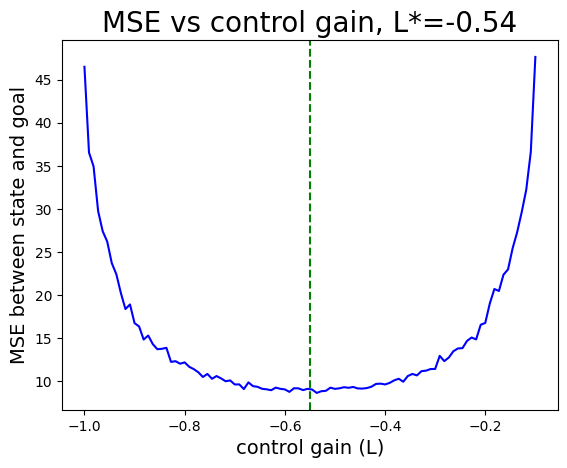

In [111]:
def calculate_plot_mse():
    D, B, noise_var, ini_state = 1.1, 2., 0.1, 2.
    num_iterations = 50
    num_candidates = 100

    control_gain_array = np.linspace(0.1, 1., num_candidates)
    mse_array = np.zeros([num_candidates, num_iterations])

    for j in range(num_iterations):
        for i in range(num_candidates):
            lds = LDS(ini_state, noise_var)
            L = - np.ones(T) * control_gain_array[i]
            s, a = lds.dynamics_closedloop(D, B, L)
            mse_array[i, j] = np.sum(s**2)

    opt = -control_gain_array[np.argmin(np.mean(mse_array, axis=1))]
    plt.figure()
    plt.plot(-control_gain_array, np.mean(mse_array, axis=1), 'b')
    plt.axvline(x=-D/B, color='g', linestyle='--')
    plt.xlabel("control gain (L)", fontsize=14)
    plt.ylabel("MSE between state and goal" , fontsize=14)
    plt.title(f"MSE vs control gain, L*={opt:0.2f}", fontsize=20)
    plt.show()
    return opt


opt = calculate_plot_mse()

In [112]:
@widgets.interact(L=widgets.FloatSlider(opt, description="L",
                                        min=-1.05, max=0.051))

def simulate_L(L):
    D, B, noise_var, ini_state = 1.1, 2., 0.1, 2.
    static_noise  = True
    lds = LDS(ini_state, noise_var, static_noise)
    # Closed loop control with the numerical optimal control gain
    Lt = np.ones(T) * L
    s_closed_loop_choice, _ = lds.dynamics_closedloop(D, B, Lt)
    # Closed loop control with the theoretical optimal control gain
    L_theory = - D / B * np.ones(T)
    s_closed_loop_theoretical, _ = lds.dynamics_closedloop(D, B, L_theory)
    # Plotting closed loop state evolution with both theoretical and numerical optimal control gains
    plt.figure(figsize=(10, 6))
    plot_vs_time(s_closed_loop_theoretical,
                 'Closed Loop (Theoretical optimal control gain)', 'b',
                 show=False)
    plot_vs_time(s_closed_loop_choice,
                 f'Closed Loop (your choice of L = {L:.2f})', 'g',
                 goal=np.zeros(T), ylabel="State", show=False)
    plt.title(f'Closed-loop State Evolution. L* = {opt:.2f}')
    plt.show()

interactive(children=(FloatSlider(value=-0.5363636363636364, description='L', max=0.051, min=-1.05), Output())…

In [113]:
class LQR(LDS):
    def __init__(self, ini_state, noise_var, static_noise=False):
        super().__init__(ini_state, noise_var, static_noise)
        self.T = T
        self.goal = np.zeros(T)  # The class LQR only supports g=0

    def control_gain_LQR(self, D, B, rho):
        P = np.zeros(self.T)  # Dynamic programming variable
        L = np.zeros(self.T - 1)  # control gain
        P[-1] = 1
        for t in range(self.T - 1):
            P_t_1 = P[self.T - t - 1]
            P[self.T - t-2] = (1 + P_t_1 * D**2 - D * P_t_1 * B / (rho + P_t_1 * B**2) * B * P_t_1 * D)
            L[self.T - t-2] = - (1 / (rho + P_t_1 * B**2) * B * P_t_1 * D)
        return L

    def calculate_J_state(self, s:np.ndarray):

        # calculate the state
        J_state = np.sum((s - self.goal)**2)

        return J_state

    def calculate_J_control(self, a:np.ndarray):

        # calculate the control
        J_control = np.sum(a**2)

        return J_control


# Test class
test_lqr_class(LQR)

Well Done!


In [114]:
@widgets.interact(rho=widgets.FloatSlider(25.,
                                          description="ρ",
                                          min=0., max=50.))

def simulate_rho(rho=1.):
    D, B, ini_state, noise_var = 1.1, 2., 1., .1  # state parameter
    static_noise = True
    lqr = LQR(ini_state, noise_var, static_noise)
    L = lqr.control_gain_LQR(D, B, rho)
    s_lqr, a_lqr = lqr.dynamics_closedloop(D, B, L)

    plt.figure(figsize=(14, 4))
    plt.suptitle('LQR Control for rho = {}'.format(rho), y=1.05)

    plt.subplot(1, 3, 1)
    plot_vs_time(s_lqr,'State evolution','b',goal=np.zeros(T), show=False)
    plt.ylabel('State $s_t$')

    plt.subplot(1, 3, 2)
    plot_vs_time(a_lqr,'LQR Action','b', show=False)
    plt.ylabel('Action $a_t$')

    plt.subplot(1, 3, 3)
    plot_vs_time(L,'Control Gain','b', show=False)
    plt.ylabel('Control Gain $L_t$')

    plt.tight_layout()
    plt.show()

interactive(children=(FloatSlider(value=25.0, description='ρ', max=50.0), Output()), _dom_classes=('widget-int…

In [115]:
class LQR_tracking(LQR):
    def __init__(self, ini_state, noise_var, goal):
        super().__init__(ini_state, noise_var)
        self.T = T
        self.goal = goal

    def dynamics_tracking(self, D, B, L):

        s = np.zeros(self.T) # states intialization
        s[0] = self.ini_state

        noise = np.sqrt(self.noise_var) * standard_normal_noise

        a = np.zeros(self.T) # control intialization
        a_bar = np.zeros(self.T)
        for t in range(self.T - 1):
            a_bar[t] = ( - D * s[t] + self.goal[t + 1]) / B
            a[t] =  L[t] * (s[t] - self.goal[t]) + a_bar[t]
            s[t + 1] = D * s[t] + B * a[t] + noise[t]

        return s, a, a_bar

    def calculate_J_state(self,s):
        J_state = np.sum((s-self.g)**2)
        return J_state

    def calculate_J_control(self, a, a_bar):
        J_control = np.sum((a-a_bar)**2)
        return J_control

In [116]:
@widgets.interact(rho=widgets.FloatSlider(20., description="ρ", min=0.1, max=40.),
                  noise_var=widgets.FloatSlider(0.1, description="noise_var", min=0., max=1.),
                  goal_func=widgets.RadioButtons(options=['sin', 'step', 'ramp'],
                                                 description='goal_func:',
                                                 disabled=False))

def simulate_tracking(rho, noise_var, goal_func):
    D, B, ini_state = 1.1, 1., 0.
    if goal_func == 'sin':
        goal = np.sin(np.arange(T) * 2 * np.pi * 5 / T)
    elif goal_func == 'step':
        goal = np.zeros(T)
        goal[int(T / 3):] = 1.
    elif goal_func == 'ramp':
        goal = np.zeros(T)
        goal[int(T / 3):] = np.arange(T - int(T / 3)) / (T - int(T / 3))

    lqr_time = LQR_tracking(ini_state, noise_var, goal)
    L = lqr_time.control_gain_LQR(D, B, rho)
    s_lqr_time, a_lqr_time, a_bar_lqr_time = lqr_time.dynamics_tracking(D, B, L)

    plt.figure(figsize=(13, 5))
    plt.suptitle('LQR Control for time-varying goal', y=1.05)
    plt.subplot(1, 2, 1)
    plot_vs_time(s_lqr_time, 'State evolution $s_t$', 'b',
                 goal, ylabel="State", show=False)
    plt.subplot(1, 2, 2)
    plot_vs_time(a_lqr_time, 'Action $a_t$', 'b',
                 ylabel="Action", show=False)
    plt.show()

interactive(children=(FloatSlider(value=20.0, description='ρ', max=40.0, min=0.1), FloatSlider(value=0.1, desc…

In [117]:
class KalmanFilter():
    def __init__(self, transition_matrix, transition_covariance,
                 observation_matrix, observation_covariance,
                 initial_state_mean, initial_state_covariance):
        self.D = transition_matrix
        self.Q = transition_covariance
        self.C = observation_matrix
        self.R = observation_covariance
        self.prior = gaussian(initial_state_mean, initial_state_covariance)

    def get_estimate(self, m, a):

        predicted_estimate = self.D * self.prior.mean + a
        predicted_covariance = self.D**2 * self.prior.cov + self.Q

        innovation_estimate = m - self.C * predicted_estimate
        innovation_covariance = self.C**2 * predicted_covariance + self.R

        # Kalman gain is the weight given to the innovation (ie., the difference between the measurement and the predicted measurement)
        K = predicted_covariance * self.C / innovation_covariance
        updated_mean = predicted_estimate + K * innovation_estimate
        updated_cov = (1 - K * self.C) * predicted_covariance
        posterior = gaussian(updated_mean, updated_cov)

        # Current posterior becomes next-step prior
        self.prior = posterior

        return posterior.mean


class LQG():
    def __init__(self, transition_matrix, transition_covariance,
                 observation_matrix, observation_covariance, initial_state_mean,
                 initial_state_covariance, ntrials=1, static_noise=False):
        self.D = transition_matrix
        self.Q = transition_covariance
        self.C = observation_matrix
        self.R = observation_covariance
        self.static_noise = static_noise
        self.ntrials = ntrials
        self.t = 0
        self.latent_states = np.zeros([T, ntrials])
        self.latent_states[0] = initial_state_mean + np.sqrt(initial_state_covariance) * standard_normal_noise[0]

    def step(self, action):
        self.t += 1
        if self.static_noise:
            self.latent_states[self.t] = self.D * self.latent_states[self.t-1] + action + np.sqrt(self.Q) * standard_normal_noise[self.t-1]
            measurement = self.C * self.latent_states[self.t] + np.sqrt(self.R) * standard_normal_noise_meas[self.t]
        else:
            self.latent_states[self.t] = self.D * self.latent_states[self.t-1] + action + np.sqrt(self.Q) * np.random.randn(self.ntrials)
            measurement = self.C * self.latent_states[self.t] + np.sqrt(self.R) * np.random.randn(self.ntrials)
        return measurement

    def get_control_gain_infinite(self, rho):
        P = np.zeros(T)
        L = np.zeros(T - 1)
        P[-1] = 1

        for t in range(T - 1):
            P_t_1 = P[T - t - 1]
            P[T - t-2] = (1 + P_t_1 * self.D**2 - self.D * P_t_1 / (rho + P_t_1) * P_t_1 * self.D)
            L[T - t-2] = - (1 / (rho + P_t_1)* P_t_1 * self.D)

        return L[0]


def control_policy_LQG(control_gain, estimated_state):
    current_action =  control_gain * estimated_state
    return current_action

In [118]:
@widgets.interact(C = widgets.FloatSlider(1., description="C", min=0., max=3.),
                  proc_noise = widgets.FloatSlider(.1, description="proc_noise", min=0.0, max=1.),
                  meas_noise = widgets.FloatSlider(.2, description="meas_noise", min=0.1, max=1.))

def simulate_kf_no_control(C, proc_noise, meas_noise):

    D = 0.9
    ini_state_mean = 5.
    ini_state_cov = .1
    estimates = np.zeros(T)
    estimates[0] = ini_state_mean

    filter = KalmanFilter(transition_matrix=D,
                          transition_covariance=proc_noise,
                          observation_matrix=C,
                          observation_covariance=meas_noise,
                          initial_state_mean=ini_state_mean,
                          initial_state_covariance=ini_state_cov)

    system = LQG(transition_matrix=D,
                 transition_covariance=proc_noise,
                 observation_matrix=C,
                 observation_covariance=meas_noise,
                 initial_state_mean=ini_state_mean,
                 initial_state_covariance=ini_state_cov,
                 static_noise=False)

    action = 0
    for t in range(1, T):
        measurement = system.step(action)
        estimates[t] = filter.get_estimate(measurement, action)

    plot_kf_state_vs_time(system.latent_states, estimates,
                          'State estimation with KF (Stable system without control input)')

interactive(children=(FloatSlider(value=1.0, description='C', max=3.0), FloatSlider(value=0.1, description='pr…

In [119]:
@widgets.interact(C = widgets.FloatSlider(1., description="C", min=0., max=3.),
                  L = widgets.FloatSlider(-.3, description="L", min=-.5, max=0.),
                  proc_noise = widgets.FloatSlider(.1, description="proc_noise", min=0.0, max=1.),
                  meas_noise = widgets.FloatSlider(.2, description="meas_noise", min=0.1, max=1.))


def simulate_kf_with_control(C, L, proc_noise, meas_noise):

  D = 1.1
  ini_state_mean = 5.
  ini_state_cov = .1
  estimates = np.zeros(T)
  estimates[0] = ini_state_mean
  control_gain = L

  filter = KalmanFilter(transition_matrix=D,
                        transition_covariance=proc_noise,
                        observation_matrix=C,
                        observation_covariance=meas_noise,
                        initial_state_mean=ini_state_mean,
                        initial_state_covariance=ini_state_cov)

  system = LQG(transition_matrix=D,
               transition_covariance=proc_noise,
               observation_matrix=C,
               observation_covariance=meas_noise,
               initial_state_mean=ini_state_mean,
               initial_state_covariance=ini_state_cov,
               static_noise=True)

  action = 0
  for t in range(1, T):
    measurement = system.step(action)
    estimates[t] = filter.get_estimate(measurement, action)
    action = control_policy_LQG(control_gain, estimates[t])

  title = f'State estimation with KF (control gain = {control_gain})'
  plot_kf_state_vs_time(system.latent_states, estimates, title,
                        goal=np.zeros(T))

interactive(children=(FloatSlider(value=1.0, description='C', max=3.0), FloatSlider(value=-0.3, description='L…